In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot         as plt
import mlem.mlem_reconstruct     as mr
import antea.image.fom_functions as fomf

sys.stdout = open(os.devnull, "w") ## Prevents from printing

Paths & parameters:

In [2]:
path_to_mlem     = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
reco_prefix_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim_reco/images_fastsim/'

th         = '1.5'
tof        = 240
n_coinc    = 42031084
n_iter     = 100
save_every = 2

MLEM reconstruction:

In [4]:
sys.stdout = sys.__stdout__ ## This line prevents from printing
rec        = mr.MLEMReconstructor(libpath=path_to_mlem)
rec.prefix = reco_prefix_base + f'{n_iter}iter/{th}th/im_th{th}_TOF{str(tof)}ps_{n_coinc}coinc_iter'

In [5]:
the_imgs = []
for i in range(0, n_iter, save_every):
    img = rec.read_image(i)
    sys.stdout = sys.__stdout__ ## This line prevents from printing
    the_imgs.append(img)

In [6]:
the_imgs[0].shape

(60, 60, 60)

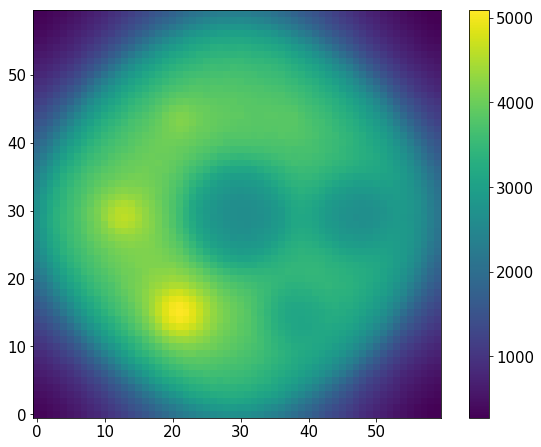

In [9]:
n_iter    = 0
slice_min = 25
slice_max = 35
plt.imshow(np.sum(the_imgs[n_iter][:,:,slice_min:slice_max], axis=2).transpose(), origin='lower')
plt.colorbar()
plt.show()

#### Comparison between different number of iterations:

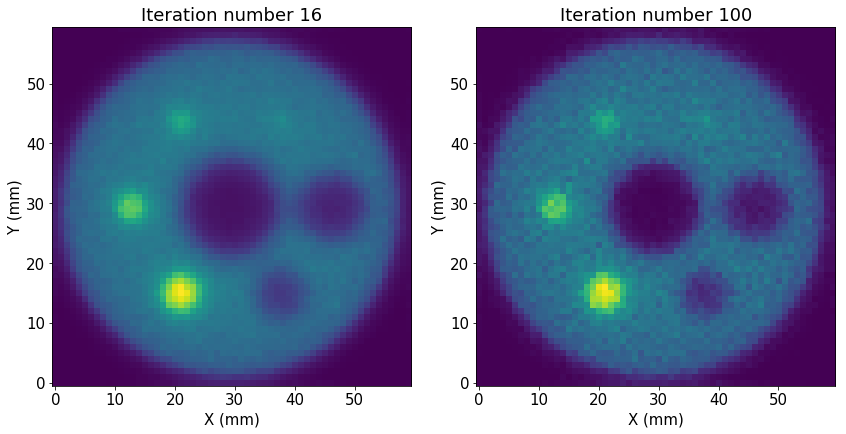

In [14]:
n_iter0   = 16
n_iter1   = 100
slice_min = 25
slice_max = 35

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12, 7))
im0 = ax0.imshow(np.sum(the_imgs[int(n_iter0/2-1)][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax0.set_title(f'Iteration number {n_iter0}', fontsize=18)
im1 = ax1.imshow(np.sum(the_imgs[int(n_iter1/2-1)][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax1.set_title(f'Iteration number {n_iter1}', fontsize=18)
ax0.set_xlabel('X (mm)')
ax1.set_xlabel('X (mm)')
ax0.set_ylabel('Y (mm)')
ax1.set_ylabel('Y (mm)')
plt.tight_layout()
plt.show()

## Plot contrast recovery coefficient (CRC) as a function of the iteration

### Image parameters

In [12]:
sig_intensity  =  4
bckg_intensity =  1
radial_pos     = 50.
bckg_radius    =  4.
phi0           = np.pi/6
phi_step       = np.pi/3
n_phi          = 6

hot_radii   = [4., 6.5, 8.5, 11.]
cold_radii  = [14., 18.5]
hot_angles  = [np.pi/3, 2*np.pi/3, 3*np.pi/3, 4*np.pi/3]
cold_angles = [5*np.pi/3, 6*np.pi/3]

x_size = y_size = z_size = 180
x_bins = y_bins = z_bins =  60

In [8]:
## Configuration for plots ##
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 10, 7.5

## colors
tableau = [( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
           ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
           (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
           (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
           (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229), 
           (218,  60,  78), (35,  180, 203)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):
    r, g, b = tableau[i]
    tableau[i] = (r / 255., g / 255., b / 255.)

blue   = tableau[0]
green  = tableau[4]
fucsia = tableau[6]
light_red   = tableau[20]
light_blue  = tableau[21]

### CRC from the images:

In [13]:
crcs_hot_0,  crcs_hot_1  = [], []
crcs_hot_2,  crcs_hot_3  = [], []
crcs_cold_0, crcs_cold_1 = [], []

err_crcs_hot_0,  err_crcs_hot_1  = [], []
err_crcs_hot_2,  err_crcs_hot_3  = [], []
err_crcs_cold_0, err_crcs_cold_1 = [], []

for i in range(len(the_imgs)):
    crc_hot0, err_hot0 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity,
                                        hot_radii[0], radial_pos, hot_angles[0], bckg_radius,
                                        phi0, phi_step, n_phi, x_size, y_size, z_size,
                                        x_bins, y_bins, z_bins)
    crc_hot1, err_hot1 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity,
                                        hot_radii[1], radial_pos, hot_angles[1], bckg_radius,
                                        phi0, phi_step, n_phi, x_size, y_size, z_size,
                                        x_bins, y_bins, z_bins)
    crc_hot2, err_hot2 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity,
                                        hot_radii[2], radial_pos, hot_angles[2], bckg_radius,
                                        phi0, phi_step, n_phi, x_size, y_size, z_size,
                                        x_bins, y_bins, z_bins)
    crc_hot3, err_hot3 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity,
                                        hot_radii[3], radial_pos, hot_angles[3], bckg_radius,
                                        phi0, phi_step, n_phi, x_size, y_size, z_size,
                                        x_bins, y_bins, z_bins)
    crcs_hot_0.append(crc_hot0*100)
    crcs_hot_1.append(crc_hot1*100)
    crcs_hot_2.append(crc_hot2*100)
    crcs_hot_3.append(crc_hot3*100)
    
    err_crcs_hot_0.append(err_hot0*100)
    err_crcs_hot_1.append(err_hot1*100)
    err_crcs_hot_2.append(err_hot2*100)
    err_crcs_hot_3.append(err_hot3*100)
    
    crc_cold0, err_cold0 = fomf.crc_cold3d(the_imgs[i], cold_radii[0], radial_pos, cold_angles[0], bckg_radius, 
                                           phi0, phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crc_cold1, err_cold1 = fomf.crc_cold3d(the_imgs[i], cold_radii[1], radial_pos, cold_angles[1], bckg_radius, 
                                           phi0, phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crcs_cold_0.append(crc_cold0*100)
    crcs_cold_1.append(crc_cold1*100)
    
    err_crcs_cold_0.append(err_cold0*100)
    err_crcs_cold_1.append(err_cold1*100)

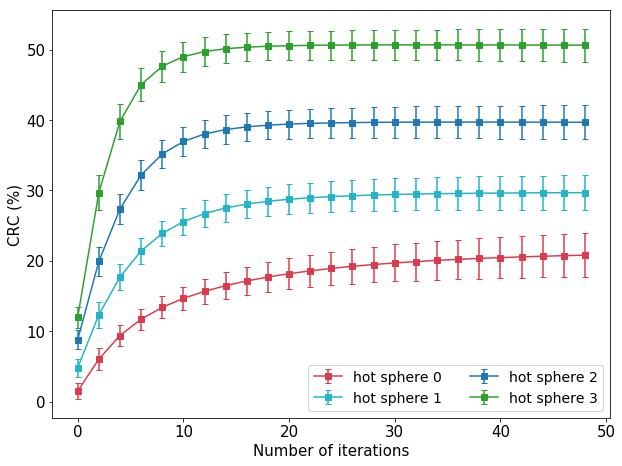

In [16]:
sel_n_iter = 50
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_0[:int(sel_n_iter/2)], yerr=err_crcs_hot_0[:int(sel_n_iter/2)], xerr=None,
             color=light_red, marker='s', capsize=3, label='hot sphere 0')
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_1[:int(sel_n_iter/2)], yerr=err_crcs_hot_1[:int(sel_n_iter/2)], xerr=None,
             color=light_blue, marker='s', capsize=3, label='hot sphere 1')
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_2[:int(sel_n_iter/2)], yerr=err_crcs_hot_2[:int(sel_n_iter/2)], xerr=None,
             color=blue, marker='s', capsize=3, label='hot sphere 2')
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_3[:int(sel_n_iter/2)], yerr=err_crcs_hot_3[:int(sel_n_iter/2)], xerr=None,
             color=green, marker='s', capsize=3, label='hot sphere 3')
#plt.xticks(list(range(0, n_iter, save_every)))
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=4, fontsize=14, ncol=2);

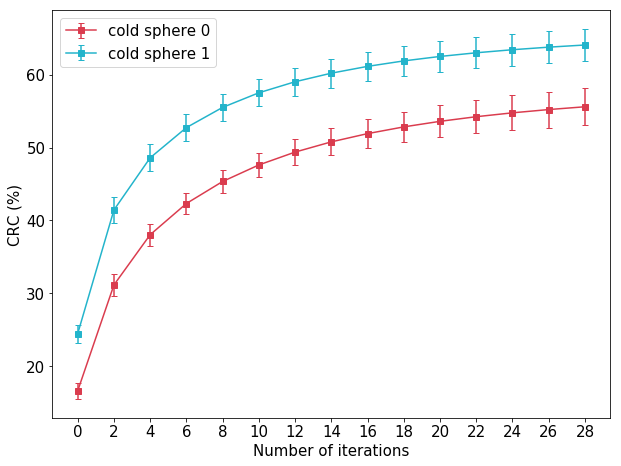

In [51]:
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_cold_0, yerr=err_crcs_hot_0, xerr=None,\
             color=light_red, marker='s', capsize=3, label='cold sphere 0')
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_cold_1, yerr=err_crcs_hot_1, xerr=None,\
             color=light_blue, marker='s', capsize=3, label='cold sphere 1')
plt.xticks(list(range(0, n_iterations, save_every)))
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=2);

## All spheres together

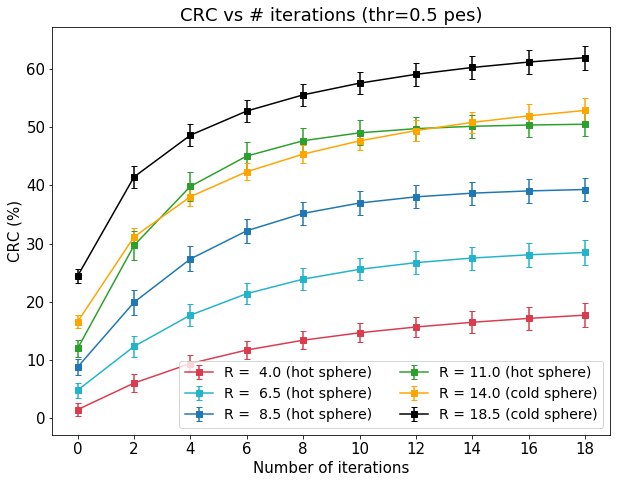

In [26]:
ls = [f'R =  {hot_radii[0]} (hot sphere)', f'R =  {hot_radii[1]} (hot sphere)', f'R =  {hot_radii[2]} (hot sphere)',
      f'R = {hot_radii[3]} (hot sphere)', f'R = {cold_radii[0]} (cold sphere)', f'R = {cold_radii[1]} (cold sphere)']

sel_n_iter = 20
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_0[:int(sel_n_iter/2)], yerr=err_crcs_hot_0[:int(sel_n_iter/2)], xerr=None,
             color=light_red, marker='s', capsize=3, label=ls[0])
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_1[:int(sel_n_iter/2)], yerr=err_crcs_hot_1[:int(sel_n_iter/2)], xerr=None,
             color=light_blue, marker='s', capsize=3, label=ls[1])
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_2[:int(sel_n_iter/2)], yerr=err_crcs_hot_2[:int(sel_n_iter/2)], xerr=None,
             color=blue, marker='s', capsize=3, label=ls[2])
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_3[:int(sel_n_iter/2)], yerr=err_crcs_hot_3[:int(sel_n_iter/2)], xerr=None,
             color=green, marker='s', capsize=3, label=ls[3])
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_cold_0[:int(sel_n_iter/2)], yerr=err_crcs_hot_0[:int(sel_n_iter/2)], xerr=None,\
             color='orange', marker='s', capsize=3, label=ls[4])
plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_cold_1[:int(sel_n_iter/2)], yerr=err_crcs_hot_1[:int(sel_n_iter/2)], xerr=None,\
             color='k', marker='s', capsize=3, label=ls[5])

plt.xticks(list(range(0, sel_n_iter, save_every)))
plt.title('CRC vs # iterations (thr=0.5 pes)')
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=4, fontsize=14, ncol=2);